In [2]:
!pip install statsmodels

In [3]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv('dadosEstacao.csv',sep=';')

In [4]:
# Criação da coluna 'data_hora' e estabelecendo o index
df['hora'] = df['Hora (UTC)'].astype(str).str.zfill(4)  # Ensure 'hora' has 4 digits
df['data_hora'] = df['Data'] + ' ' + df['hora']
df['data_hora'] = pd.to_datetime(df['data_hora'], format='%d/%m/%Y %H%M')
# Estabelecer 'data_hora' como o index
df.set_index('data_hora', inplace=True)


In [5]:
#Resumo do dataset
print("Resumo:\n",df.describe())

Resumo:
         Hora (UTC)
count  8808.000000
mean   1150.000000
std     692.257953
min       0.000000
25%     575.000000
50%    1150.000000
75%    1725.000000
max    2300.000000


In [6]:
#Informações gerais e tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8808 entries, 2024-01-23 00:00:00 to 2025-01-23 23:00:00
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  8808 non-null   object
 1   Hora (UTC)            8808 non-null   int64 
 2   Temp. Ins. (C)        8781 non-null   object
 3   Temp. Max. (C)        8781 non-null   object
 4   Temp. Min. (C)        8781 non-null   object
 5   Umi. Ins. (%)         8781 non-null   object
 6   Umi. Max. (%)         8781 non-null   object
 7   Umi. Min. (%)         8780 non-null   object
 8   Pto Orvalho Ins. (C)  8781 non-null   object
 9   Pto Orvalho Max. (C)  8781 non-null   object
 10  Pto Orvalho Min. (C)  8781 non-null   object
 11  Pressao Ins. (hPa)    8783 non-null   object
 12  Pressao Max. (hPa)    8783 non-null   object
 13  Pressao Min. (hPa)    8783 non-null   object
 14  Vel. Vento (m/s)      8782 non-null   object
 15  Di

In [7]:
#verificação do tipo de dado da coluna index (data_hora)
df.index

DatetimeIndex(['2024-01-23 00:00:00', '2024-01-23 01:00:00',
               '2024-01-23 02:00:00', '2024-01-23 03:00:00',
               '2024-01-23 04:00:00', '2024-01-23 05:00:00',
               '2024-01-23 06:00:00', '2024-01-23 07:00:00',
               '2024-01-23 08:00:00', '2024-01-23 09:00:00',
               ...
               '2025-01-23 14:00:00', '2025-01-23 15:00:00',
               '2025-01-23 16:00:00', '2025-01-23 17:00:00',
               '2025-01-23 18:00:00', '2025-01-23 19:00:00',
               '2025-01-23 20:00:00', '2025-01-23 21:00:00',
               '2025-01-23 22:00:00', '2025-01-23 23:00:00'],
              dtype='datetime64[ns]', name='data_hora', length=8808, freq=None)

In [8]:
df.head()

Data  Hora (UTC) Temp. Ins. (C) Temp. Max. (C)  \
data_hora                                                                   
2024-01-23 00:00:00  23/01/2024           0           21,5           21,9   
2024-01-23 01:00:00  23/01/2024         100           20,9           21,6   
2024-01-23 02:00:00  23/01/2024         200           20,7           21,0   
2024-01-23 03:00:00  23/01/2024         300           20,1           20,9   
2024-01-23 04:00:00  23/01/2024         400           20,2           20,8   

                    Temp. Min. (C) Umi. Ins. (%) Umi. Max. (%) Umi. Min. (%)  \
data_hora                                                                      
2024-01-23 00:00:00           21,4          85,0          86,0          83,0   
2024-01-23 01:00:00           20,8          89,0          89,0          85,0   
2024-01-23 02:00:00           20,4          88,0          92,0          87,0   
2024-01-23 03:00:00           20,1          91,0          91,0          88,0   
2024-01-23 04:00:00           20,0          92,0          92,0          89,0   

                    Pto Orvalho Ins. (C) Pto Orvalho Max. (C)  \
data_hora                                                       
2024-01-23 00:00:00                 19,0                 19,0   
2024-01-23 01:00:00                 18,9                 19,1   
2024-01-23 02:00:00                 18,8                 19,2   
2024-01-23 03:00:00                 18,6                 19,0   
2024-01-23 04:00:00                 18,9                 19,1   

                    Pto Orvalho Min. (C) Pressao Ins. (hPa)  \
data_hora                                                     
2024-01-23 00:00:00                 18,7              886,6   
2024-01-23 01:00:00                 18,8              886,9   
2024-01-23 02:00:00                 18,7              887,1   
2024-01-23 03:00:00                 18,6              886,7   
2024-01-23 04:00:00                 18,6              886,0   

                    Pressao Max. (hPa) Pressao Min. (hPa) Vel. Vento (m/s)  \
data_hora                                                                    
2024-01-23 00:00:00              886,7              885,8              1,2   
2024-01-23 01:00:00              886,9              886,6              1,0   
2024-01-23 02:00:00              887,1              886,9              1,1   
2024-01-23 03:00:00              887,2              886,7              1,2   
2024-01-23 04:00:00              886,7              886,0              1,0   

                    Dir. Vento (m/s) Raj. Vento (m/s) Radiacao (KJ/m²)  \
data_hora                                                                
2024-01-23 00:00:00            304,0              3,6              NaN   
2024-01-23 01:00:00            290,0              2,9              NaN   
2024-01-23 02:00:00            296,0              2,5              NaN   
2024-01-23 03:00:00            301,0              2,4              NaN   
2024-01-23 04:00:00            315,0              2,2              NaN   

                    Chuva (mm)  hora  
data_hora                             
2024-01-23 00:00:00        0,0  0000  
2024-01-23 01:00:00        0,0  0100  
2024-01-23 02:00:00        0,0  0200  
2024-01-23 03:00:00        0,0  0300  
2024-01-23 04:00:00        0,0  0400

In [9]:
df= df.drop('Data',axis=1)

In [10]:
df= df.drop('Hora (UTC)',axis=1)

In [11]:
df= df.drop('hora',axis=1)

In [12]:
df.head()

Temp. Ins. (C) Temp. Max. (C) Temp. Min. (C)  \
data_hora                                                          
2024-01-23 00:00:00           21,5           21,9           21,4   
2024-01-23 01:00:00           20,9           21,6           20,8   
2024-01-23 02:00:00           20,7           21,0           20,4   
2024-01-23 03:00:00           20,1           20,9           20,1   
2024-01-23 04:00:00           20,2           20,8           20,0   

                    Umi. Ins. (%) Umi. Max. (%) Umi. Min. (%)  \
data_hora                                                       
2024-01-23 00:00:00          85,0          86,0          83,0   
2024-01-23 01:00:00          89,0          89,0          85,0   
2024-01-23 02:00:00          88,0          92,0          87,0   
2024-01-23 03:00:00          91,0          91,0          88,0   
2024-01-23 04:00:00          92,0          92,0          89,0   

                    Pto Orvalho Ins. (C) Pto Orvalho Max. (C)  \
data_hora                                                       
2024-01-23 00:00:00                 19,0                 19,0   
2024-01-23 01:00:00                 18,9                 19,1   
2024-01-23 02:00:00                 18,8                 19,2   
2024-01-23 03:00:00                 18,6                 19,0   
2024-01-23 04:00:00                 18,9                 19,1   

                    Pto Orvalho Min. (C) Pressao Ins. (hPa)  \
data_hora                                                     
2024-01-23 00:00:00                 18,7              886,6   
2024-01-23 01:00:00                 18,8              886,9   
2024-01-23 02:00:00                 18,7              887,1   
2024-01-23 03:00:00                 18,6              886,7   
2024-01-23 04:00:00                 18,6              886,0   

                    Pressao Max. (hPa) Pressao Min. (hPa) Vel. Vento (m/s)  \
data_hora                                                                    
2024-01-23 00:00:00              886,7              885,8              1,2   
2024-01-23 01:00:00              886,9              886,6              1,0   
2024-01-23 02:00:00              887,1              886,9              1,1   
2024-01-23 03:00:00              887,2              886,7              1,2   
2024-01-23 04:00:00              886,7              886,0              1,0   

                    Dir. Vento (m/s) Raj. Vento (m/s) Radiacao (KJ/m²)  \
data_hora                                                                
2024-01-23 00:00:00            304,0              3,6              NaN   
2024-01-23 01:00:00            290,0              2,9              NaN   
2024-01-23 02:00:00            296,0              2,5              NaN   
2024-01-23 03:00:00            301,0              2,4              NaN   
2024-01-23 04:00:00            315,0              2,2              NaN   

                    Chuva (mm)  
data_hora                       
2024-01-23 00:00:00        0,0  
2024-01-23 01:00:00        0,0  
2024-01-23 02:00:00        0,0  
2024-01-23 03:00:00        0,0  
2024-01-23 04:00:00        0,0

#Transformação dos tipos de dados para 'float', de modo a facilitar a visualização.

In [13]:
#Tratamento dos tipos de dados.
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = df[col].str.replace(',', '.').astype(float)
    except ValueError:
        pass  

In [14]:
df.dtypes

Temp. Ins. (C)          float64
Temp. Max. (C)          float64
Temp. Min. (C)          float64
Umi. Ins. (%)           float64
Umi. Max. (%)           float64
Umi. Min. (%)           float64
Pto Orvalho Ins. (C)    float64
Pto Orvalho Max. (C)    float64
Pto Orvalho Min. (C)    float64
Pressao Ins. (hPa)      float64
Pressao Max. (hPa)      float64
Pressao Min. (hPa)      float64
Vel. Vento (m/s)        float64
Dir. Vento (m/s)        float64
Raj. Vento (m/s)        float64
Radiacao (KJ/m²)        float64
Chuva (mm)              float64
dtype: object

In [15]:
# Identificar a quantidade de linhas e colunas.
print(f"O formato do dataset é: ",df.shape)
#Intervalo dos dados
min_values = df.min()
max_values = df.max()
print("Valores mínimose máximos para cada intervalo:")
print("Mínimos\n",min_values)
print("Máximos:\n",max_values)

O formato do dataset é:  (8808, 17)
Valores mínimose máximos para cada intervalo:
Mínimos
 Temp. Ins. (C)            9.5
Temp. Max. (C)           10.4
Temp. Min. (C)            9.5
Umi. Ins. (%)            11.0
Umi. Max. (%)            12.0
Umi. Min. (%)            10.0
Pto Orvalho Ins. (C)     -4.2
Pto Orvalho Max. (C)     -3.2
Pto Orvalho Min. (C)     -5.0
Pressao Ins. (hPa)      880.3
Pressao Max. (hPa)      880.4
Pressao Min. (hPa)      880.2
Vel. Vento (m/s)          0.1
Dir. Vento (m/s)          1.0
Raj. Vento (m/s)          0.7
Radiacao (KJ/m²)          0.1
Chuva (mm)                0.0
dtype: float64
Máximos:
 Temp. Ins. (C)            35.4
Temp. Max. (C)            36.1
Temp. Min. (C)            34.2
Umi. Ins. (%)             98.0
Umi. Max. (%)             99.0
Umi. Min. (%)             98.0
Pto Orvalho Ins. (C)      21.8
Pto Orvalho Max. (C)      22.6
Pto Orvalho Min. (C)      21.3
Pressao Ins. (hPa)       895.2
Pressao Max. (hPa)       895.2
Pressao Min. (hPa)       895.1
Ve

In [16]:
#Identificação de valores faltantes
print("Quantidade de dados faltantes por coluna:\n",df.isnull().sum())

Quantidade de dados faltantes por coluna:
 Temp. Ins. (C)            27
Temp. Max. (C)            27
Temp. Min. (C)            27
Umi. Ins. (%)             27
Umi. Max. (%)             27
Umi. Min. (%)             28
Pto Orvalho Ins. (C)      27
Pto Orvalho Max. (C)      27
Pto Orvalho Min. (C)      27
Pressao Ins. (hPa)        25
Pressao Max. (hPa)        25
Pressao Min. (hPa)        25
Vel. Vento (m/s)          26
Dir. Vento (m/s)          27
Raj. Vento (m/s)          25
Radiacao (KJ/m²)        4095
Chuva (mm)                25
dtype: int64


In [17]:
#Porcentagem de dados faltantes
missing_percentage = df.isna().mean().mean()*100
print(f"Percentual de dados faltantes : {missing_percentage:.2f}%")

Percentual de dados faltantes : 3.02%


In [18]:
#Percentage of duplicates (if any)
duplicate_percentage = df.duplicated().mean()*100
print(f"Total de dados duplicados : {duplicate_percentage:.2f}%")

Total de dados duplicados : 0.27%


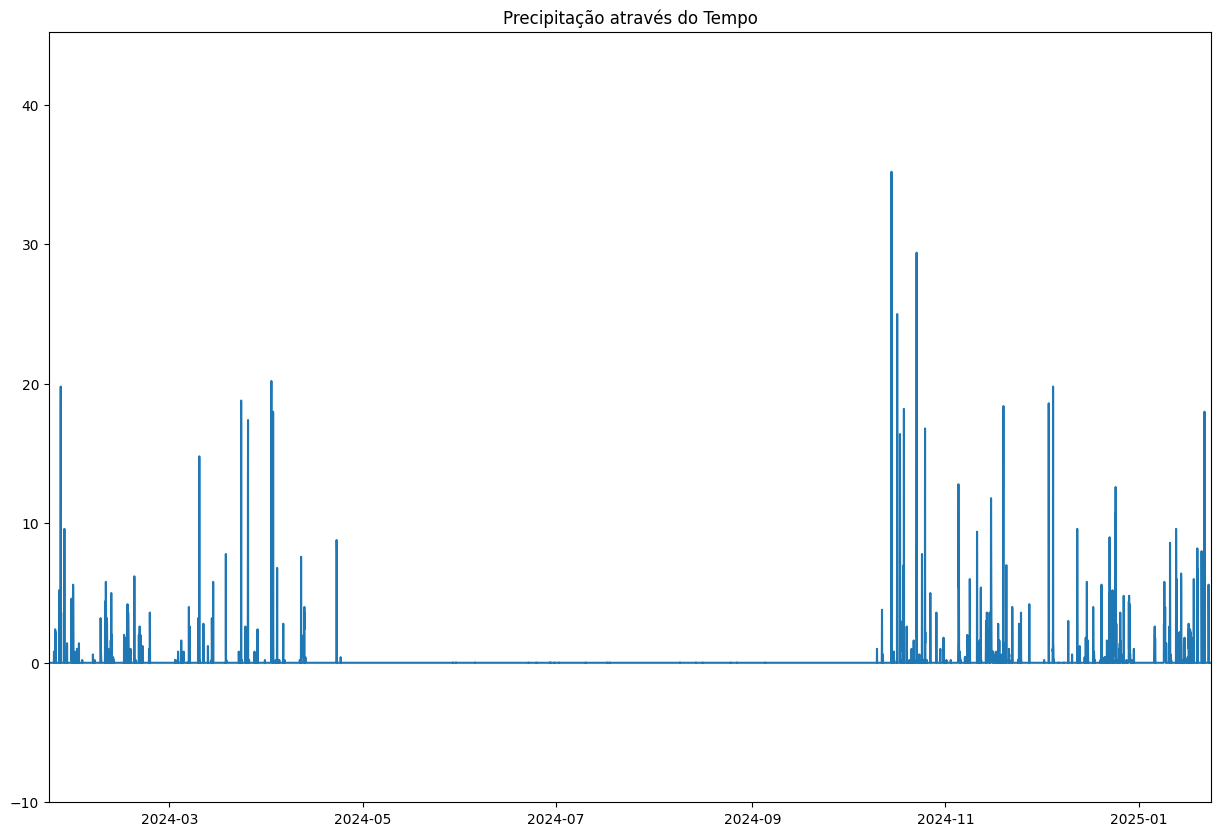

In [19]:

plt.figure(figsize=(15,10))
plt.plot(df.index,df['Chuva (mm)'], label = 'Série Temporal')
#plt.xlabel('Tempo')
#plt.ylabel('Precipitação')
plt.title(f"Precipitação através do Tempo")
plt.xlim(df.index.min(), df.index.max())  # Ajusta os limites do eixo X (tempo)
plt.ylim(df['Chuva (mm)'].min() - 10, df['Chuva (mm)'].max() + 10) 
plt.show()

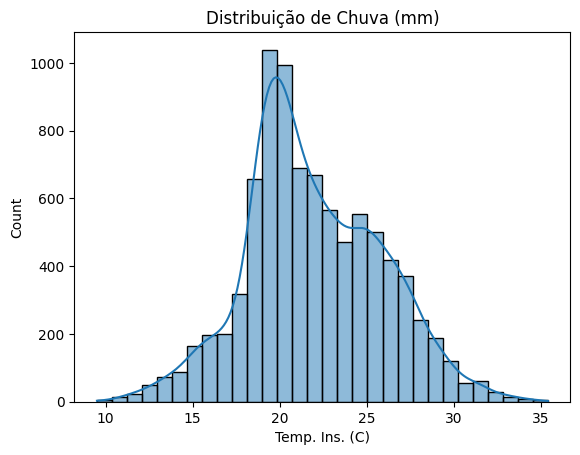

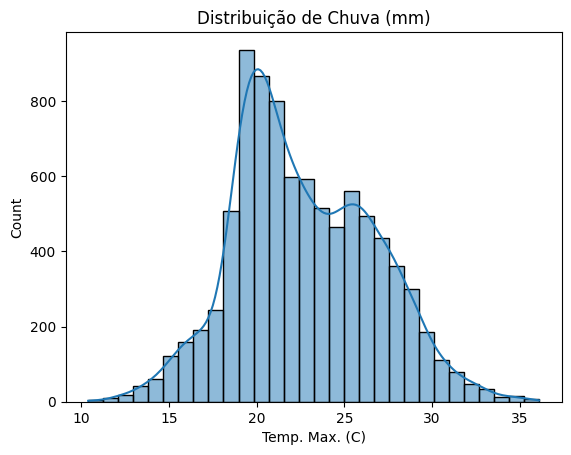

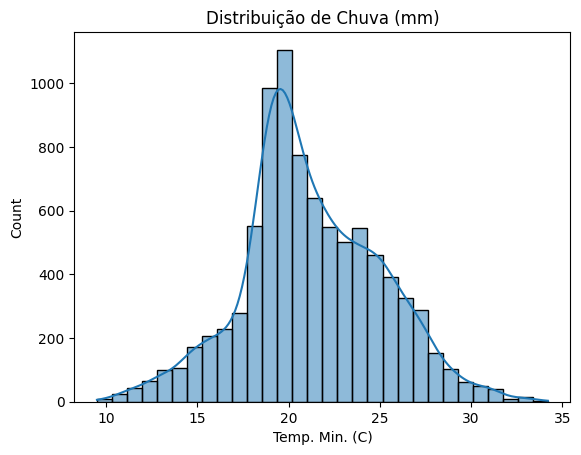

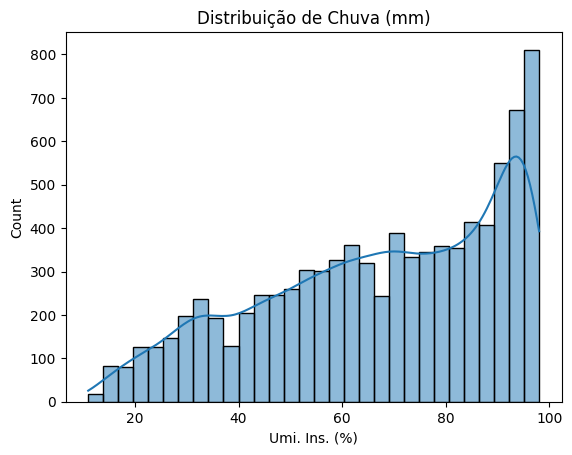

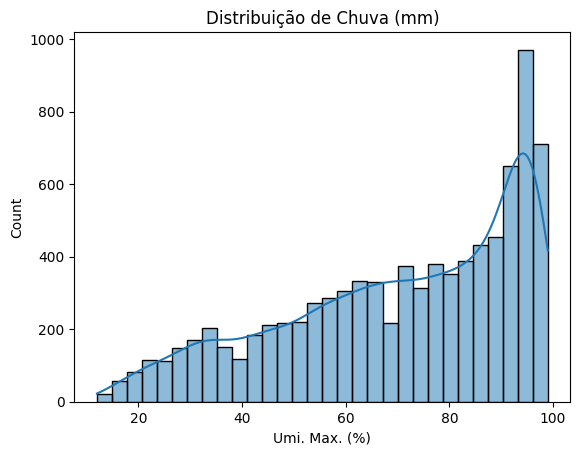

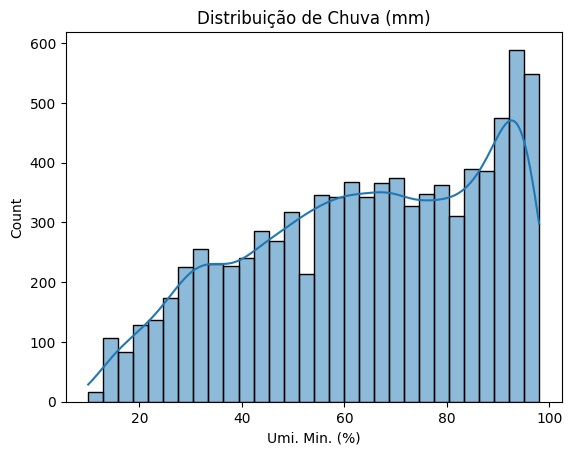

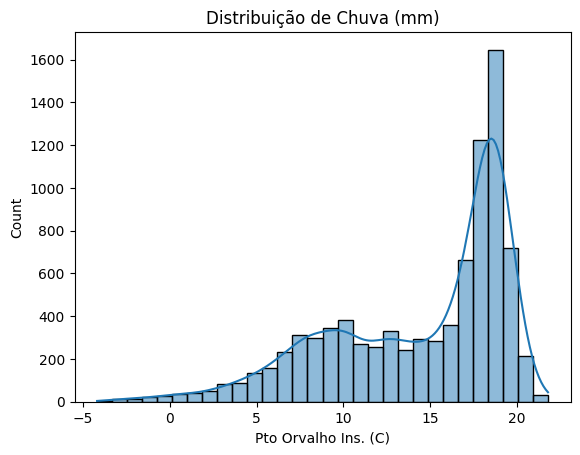

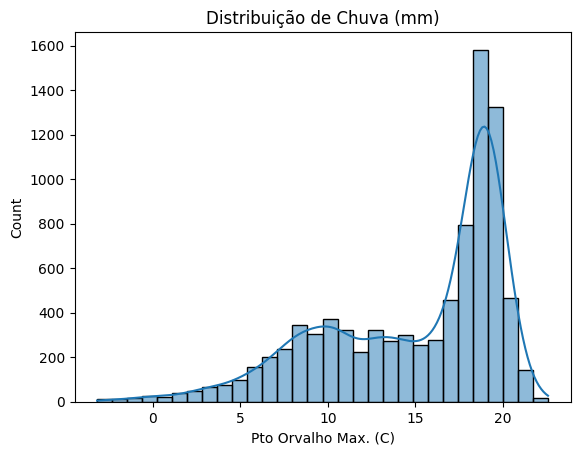

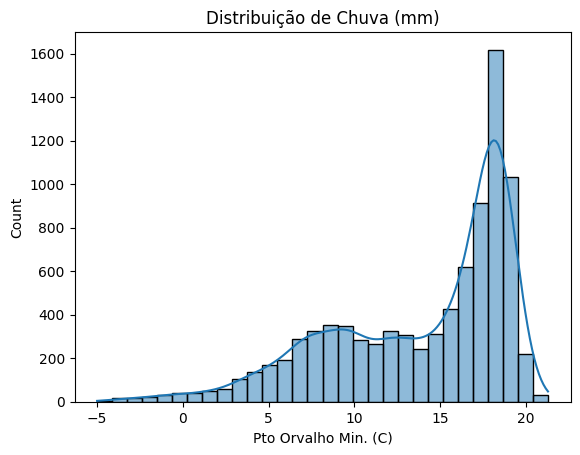

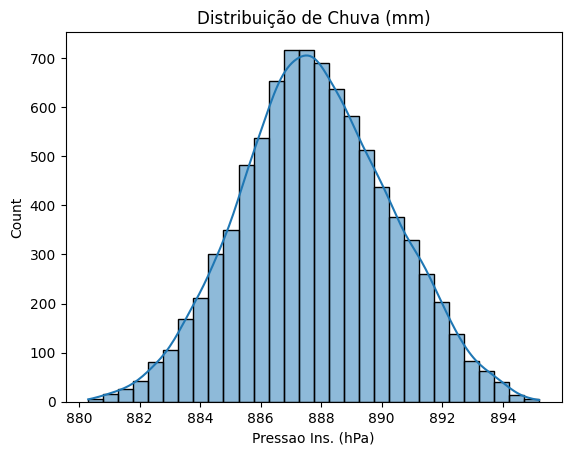

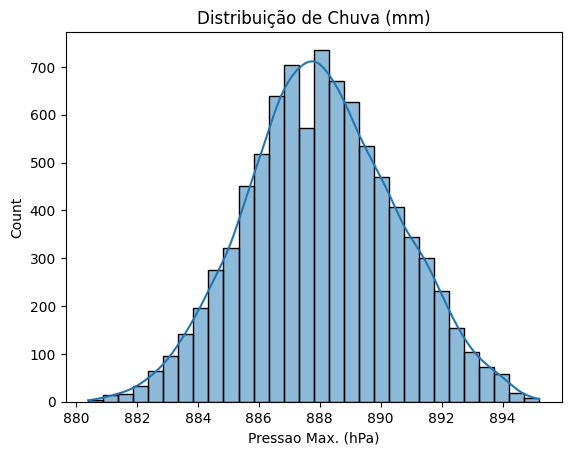

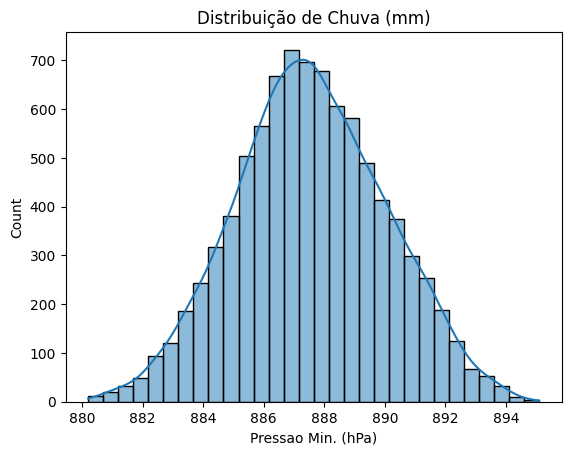

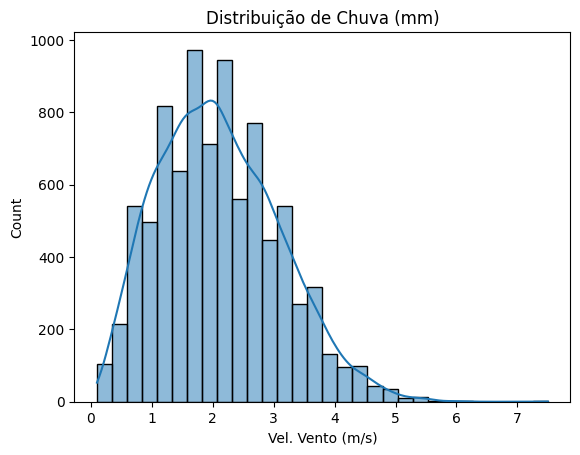

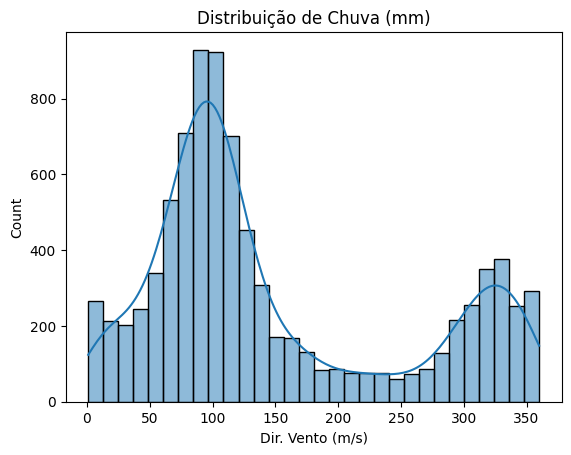

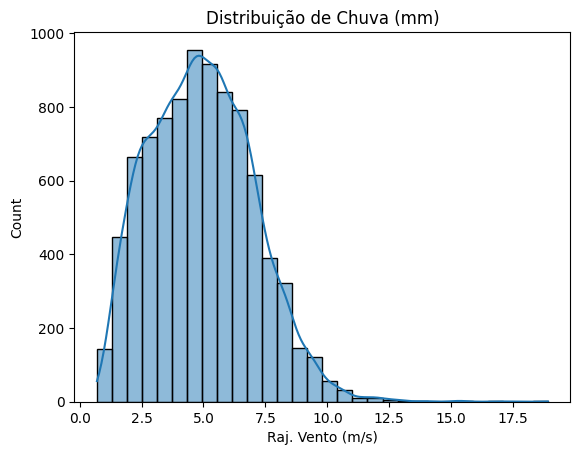

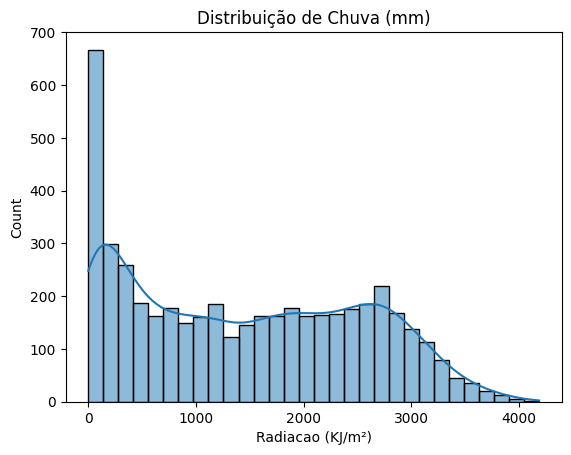

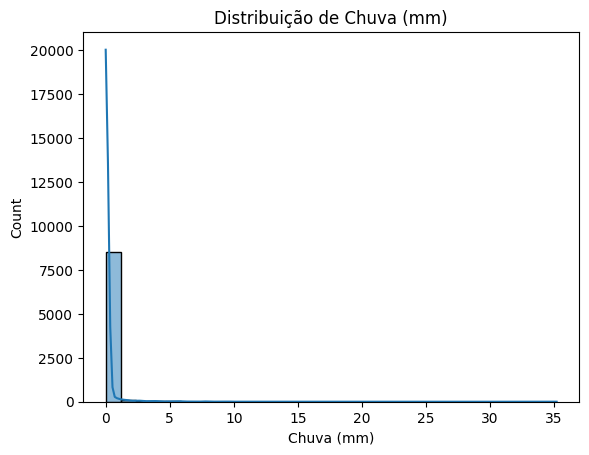

In [20]:
for coluna in df.columns:
    plt.figure()
    sns.histplot(df[coluna],kde=True,bins=30)
    plt.title(f"Distribuição de {col}")
    plt.show()

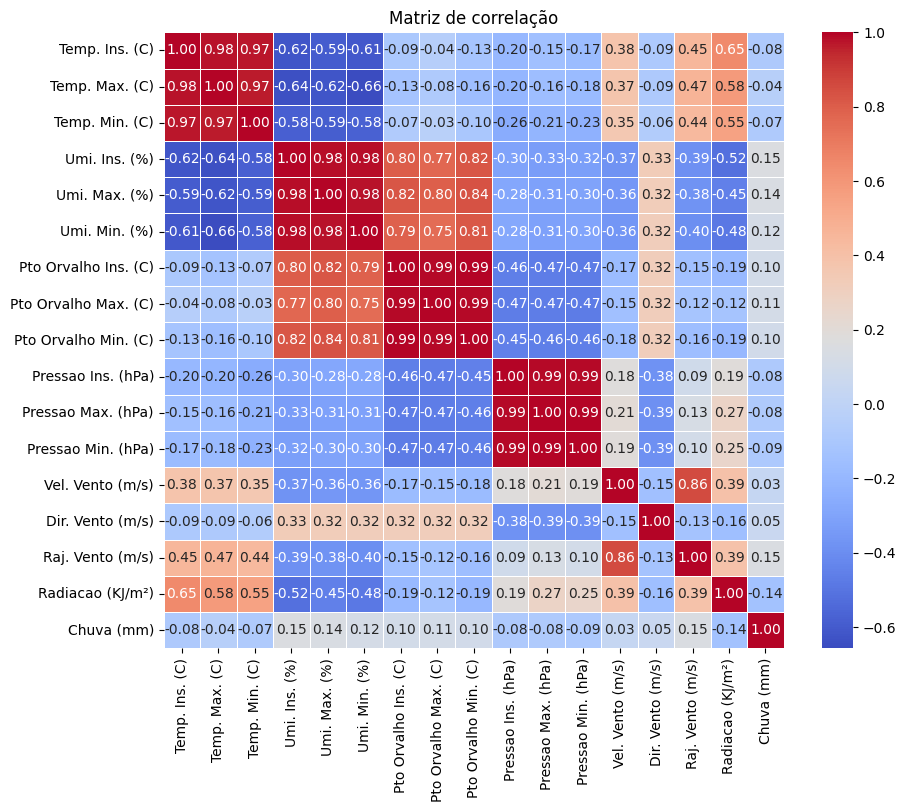

In [21]:
#Coeficiente de Pearson para verificação da correlação entre as variáveis
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Matriz de correlação')
plt.show()

In [22]:
df.columns

Index(['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)',
       'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)',
       'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)',
       'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)',
       'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)',
       'Chuva (mm)'],
      dtype='object')

In [23]:
#Criação de Atributos derivados para análise de correlação 
df['amplitude_Pressao'] = df['Pressao Max. (hPa)'] - df['Pressao Min. (hPa)']
df['amplitude_Umidade'] = df['Umi. Max. (%)'] - df['Umi. Min. (%)']
df['amplitude_Temperatura'] = df['Temp. Max. (C)'] - df['Temp. Min. (C)']


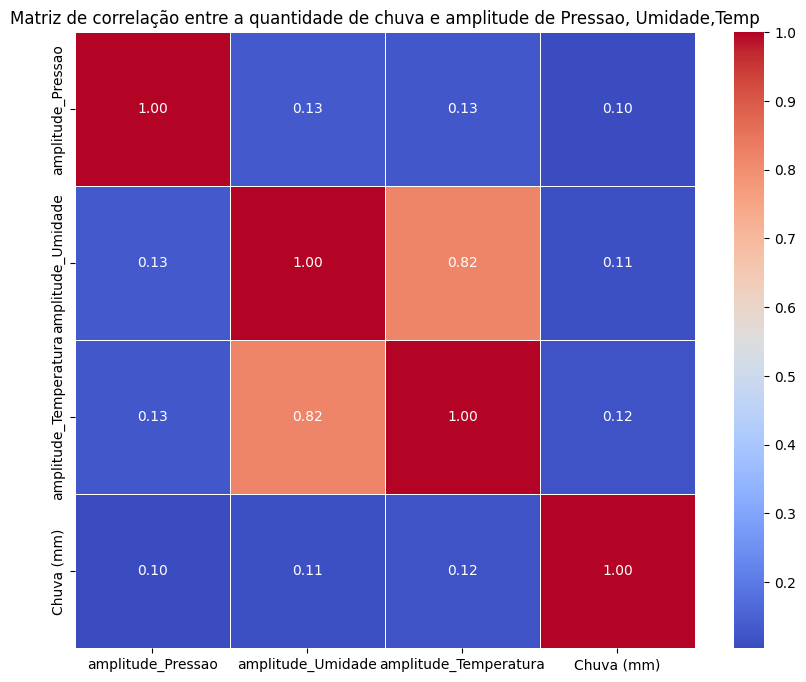

In [24]:
df_reduzido = df[['amplitude_Pressao','amplitude_Umidade','amplitude_Temperatura','Chuva (mm)']]
correlation_matrix = df_reduzido.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Matriz de correlação entre a quantidade de chuva e amplitude de Pressao, Umidade,Temp')
plt.show()

In [25]:

plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(df[col].dropna[0])


TypeError: 'method' object is not subscriptable

<Figure size 1000x500 with 0 Axes>

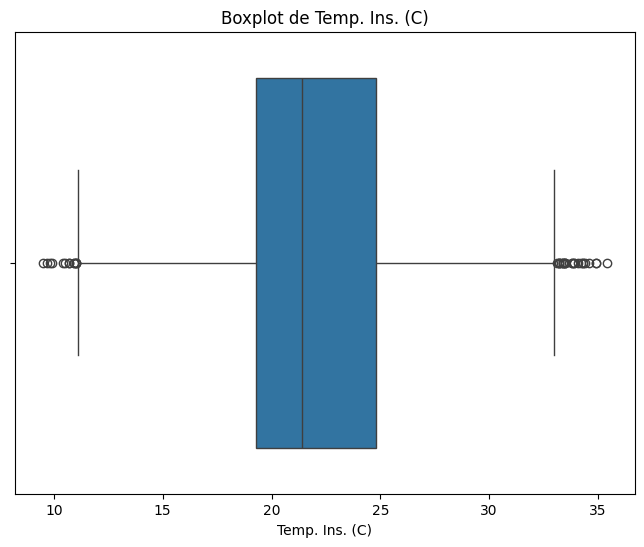

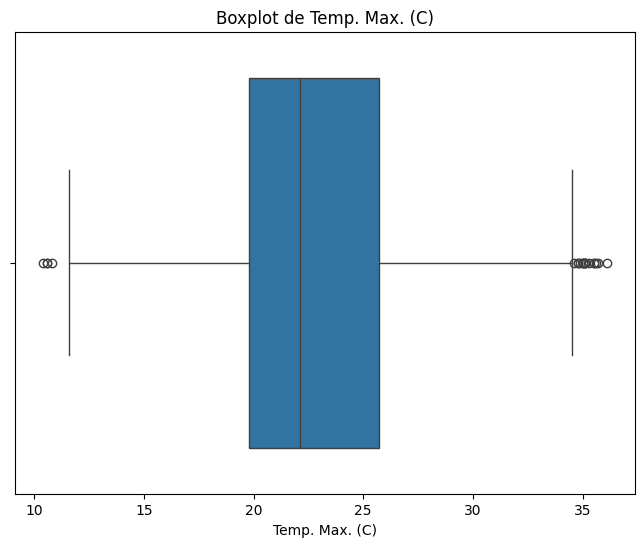

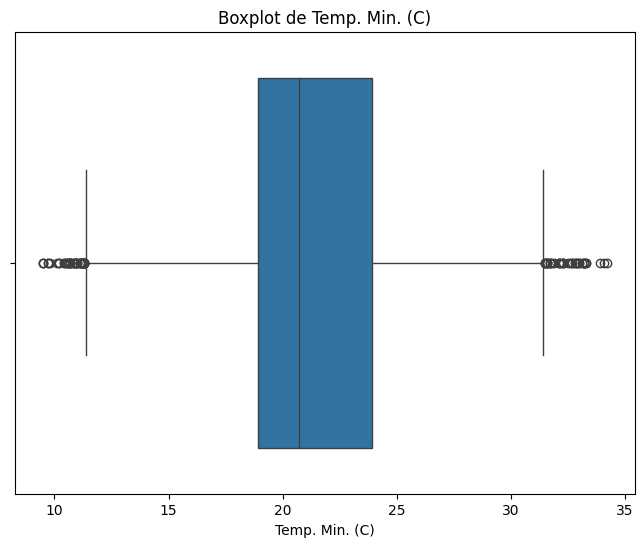

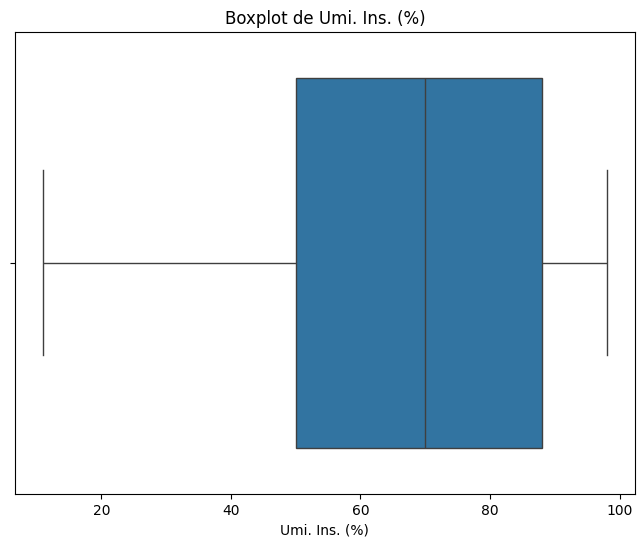

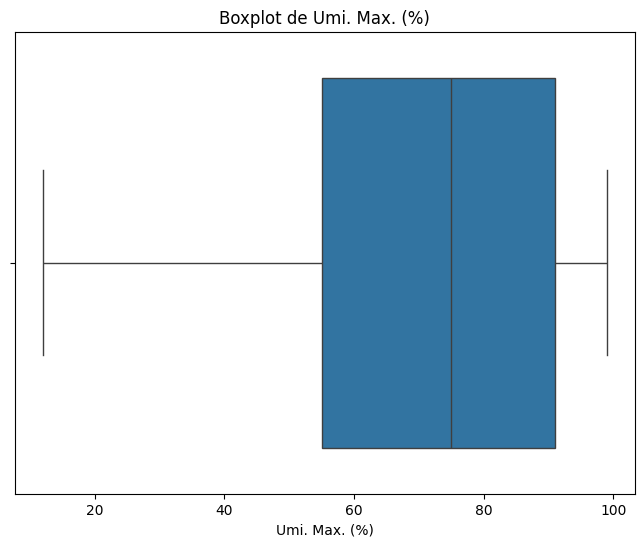

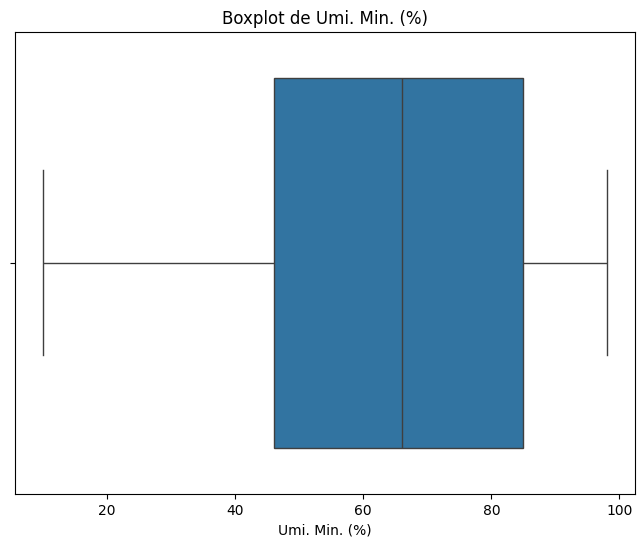

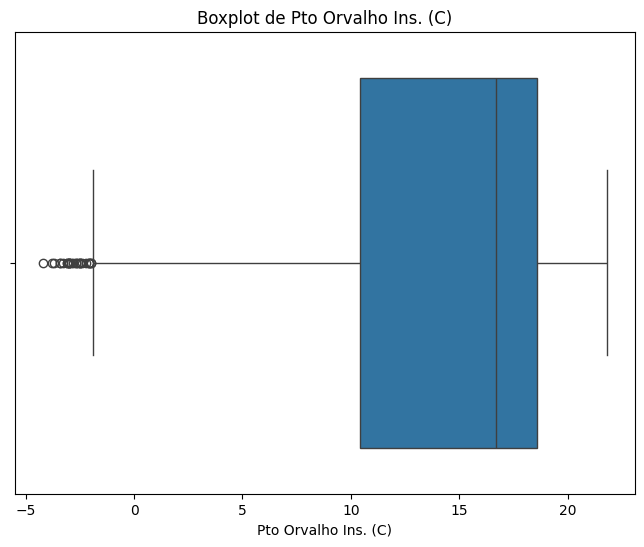

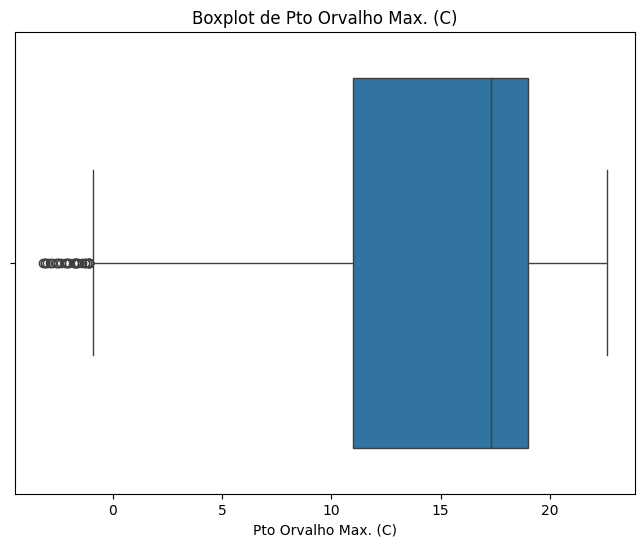

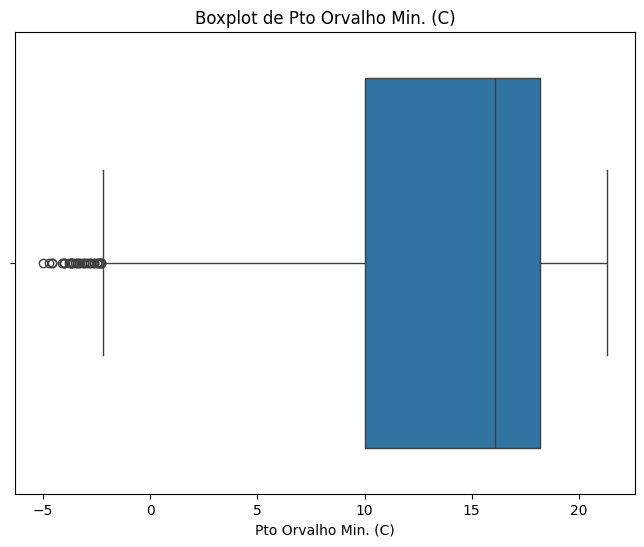

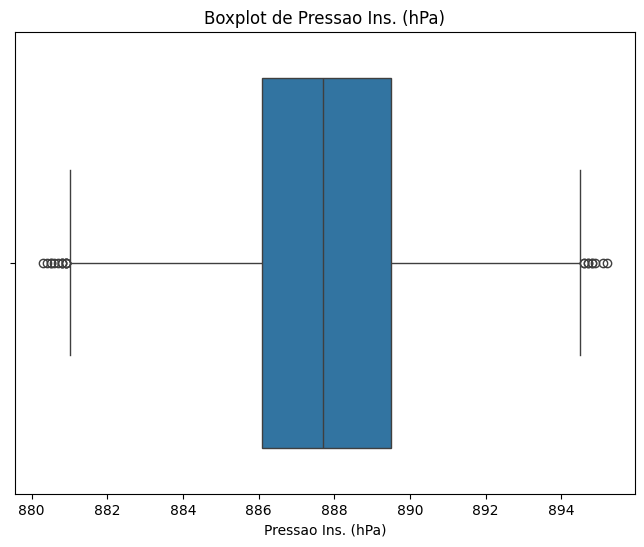

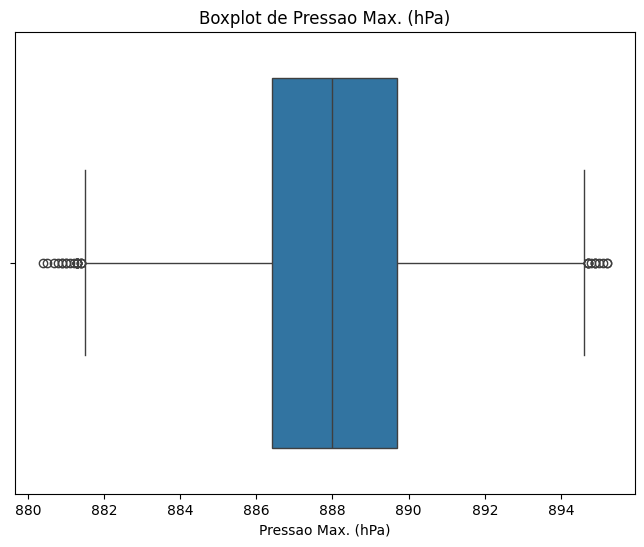

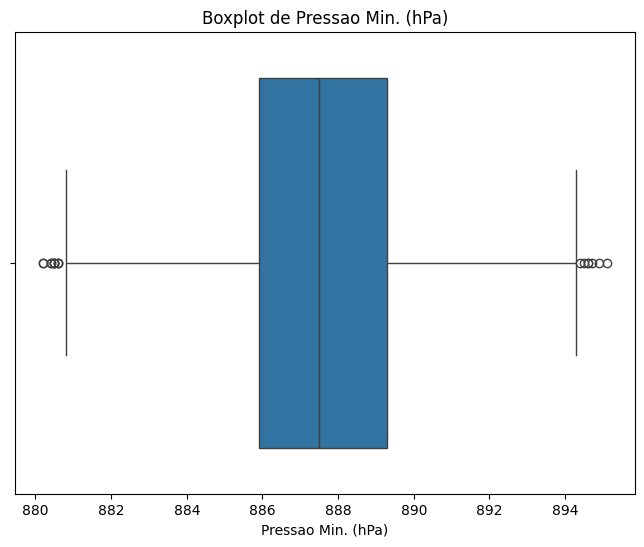

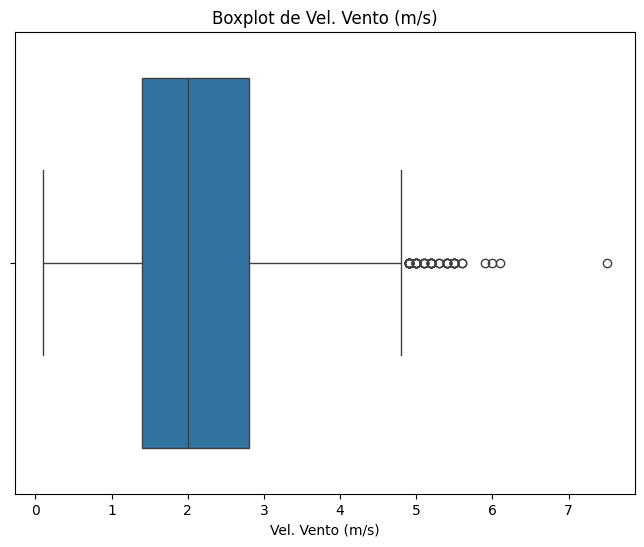

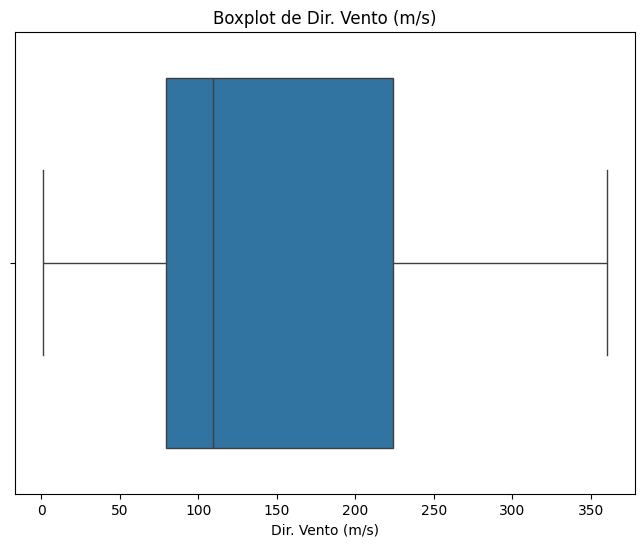

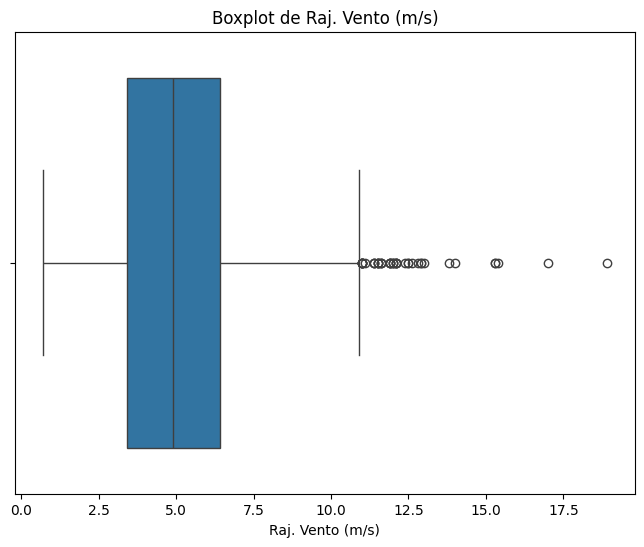

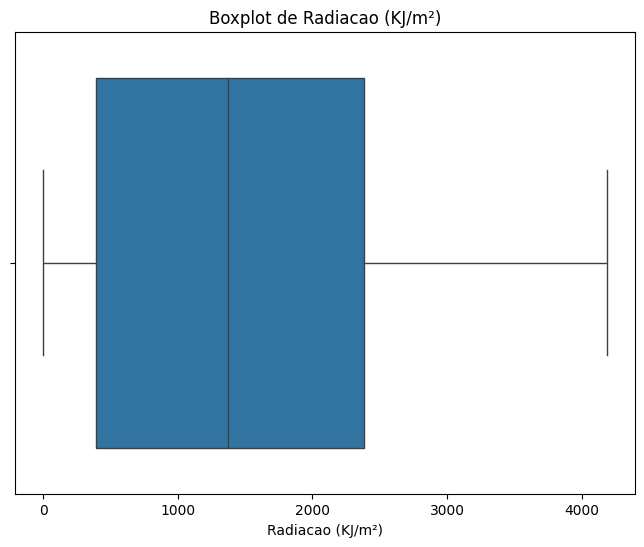

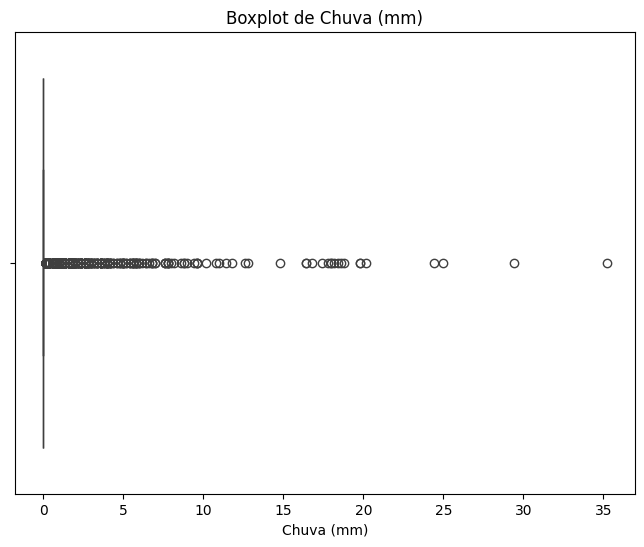

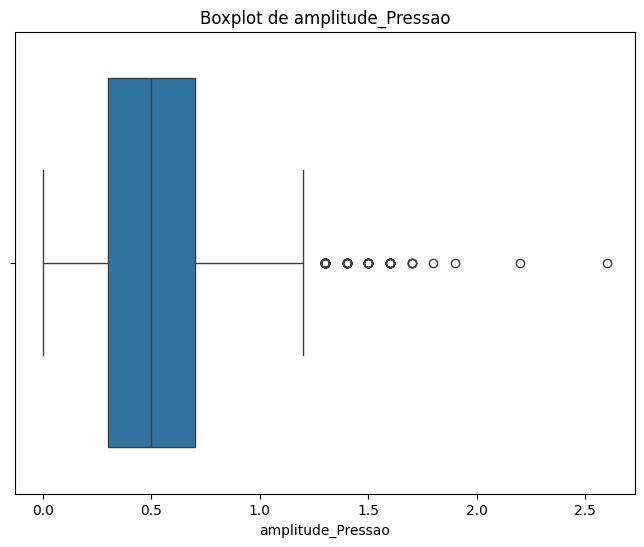

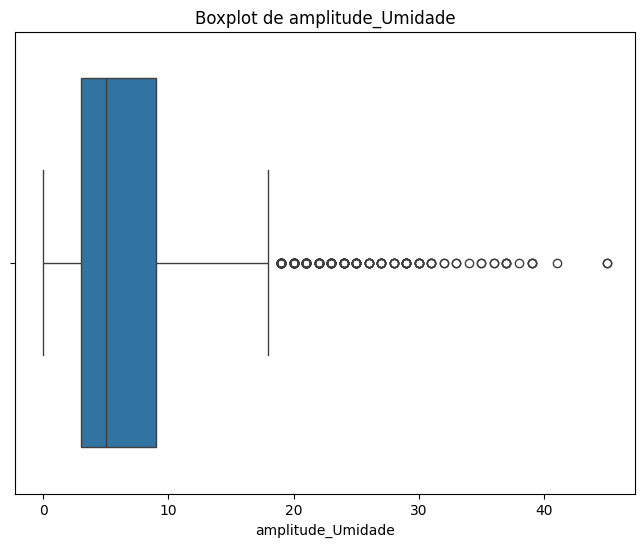

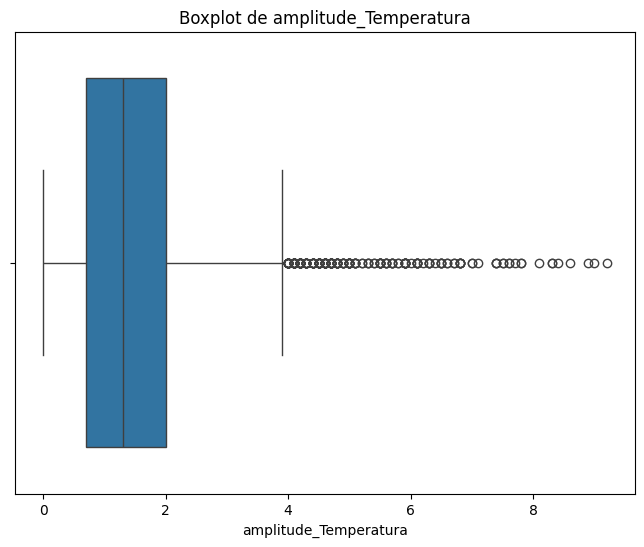

In [26]:
#Distribuição dos dados em boxplot
for coluna in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[coluna])
    plt.title(f"Boxplot de {coluna}")
    plt.xlabel(coluna)

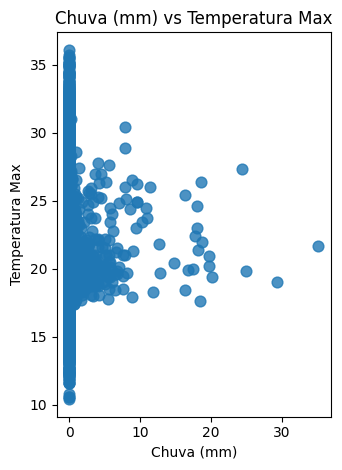

Text(0, 0.5, 'Temp. Max. (C)')

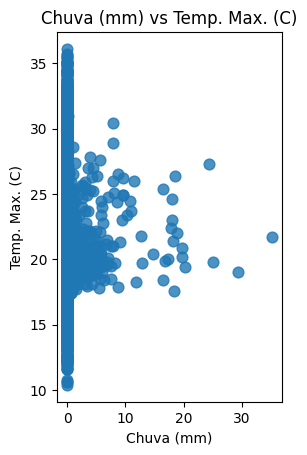

In [27]:
#Investigação da dispersão dos dados da chuva(mm) em relação à temperatura máxima e à temperatura mínima
plt.subplot(1, 2, 1)
plt.scatter(df['Chuva (mm)'], df['Temp. Max. (C)'], s=60, alpha=0.8)
plt.title('Chuva (mm) vs Temperatura Max')
plt.xlabel('Chuva (mm)')
plt.ylabel('Temperatura Max')
plt.tight_layout()  # Para ajustar o layout e evitar sobreposição de gráficos
plt.show()

plt.subplot(1, 2, 2)  # Posição 2: linha 1, coluna 2
plt.scatter(df['Chuva (mm)'], df['Temp. Max. (C)'], s=60, alpha=0.8)
plt.title('Chuva (mm) vs Temp. Max. (C)')
plt.xlabel('Chuva (mm)')
plt.ylabel('Temp. Max. (C)')

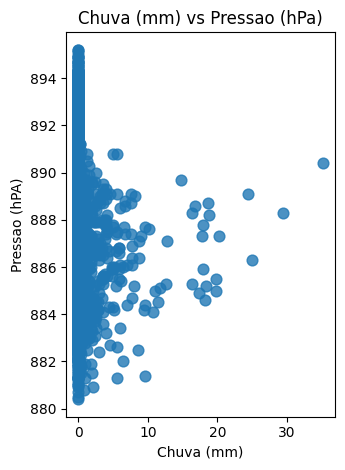

In [28]:
#Investigação da dispersão dos dados da chuva em relação à pressão máxima

#Investigação da dispersão dos dados da chuva em relação aos
plt.subplot(1, 2, 1)
plt.scatter(df['Chuva (mm)'], df['Pressao Max. (hPa)'], s=60, alpha=0.8)
plt.title('Chuva (mm) vs Pressao (hPa)')
plt.xlabel('Chuva (mm)')
plt.ylabel('Pressao (hPA)')
plt.tight_layout()  # Para ajustar o layout e evitar sobreposição de gráficos
plt.show()
#pd.plotting.scatter_matrix(df[['Chuva (mm)','Pressao Max. (hPa)']],figsize=(12,12),hist_kwds={'bins':20},s=60,alpha=0.8)
#plt.show()

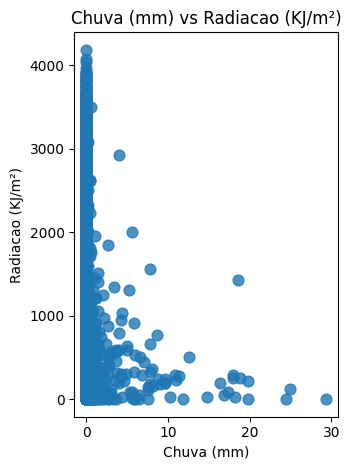

In [29]:
#Investigação da dispersão dos dados da chuva em relação à radiação
plt.subplot(1, 2, 1)
plt.scatter(df['Chuva (mm)'], df['Radiacao (KJ/m²)'], s=60, alpha=0.8)
plt.title('Chuva (mm) vs Radiacao (KJ/m²)')
plt.xlabel('Chuva (mm)')
plt.ylabel('Radiacao (KJ/m²)')

plt.tight_layout()  # Para ajustar o layout e evitar sobreposição de gráficos
plt.show()

Previsão de Outliers



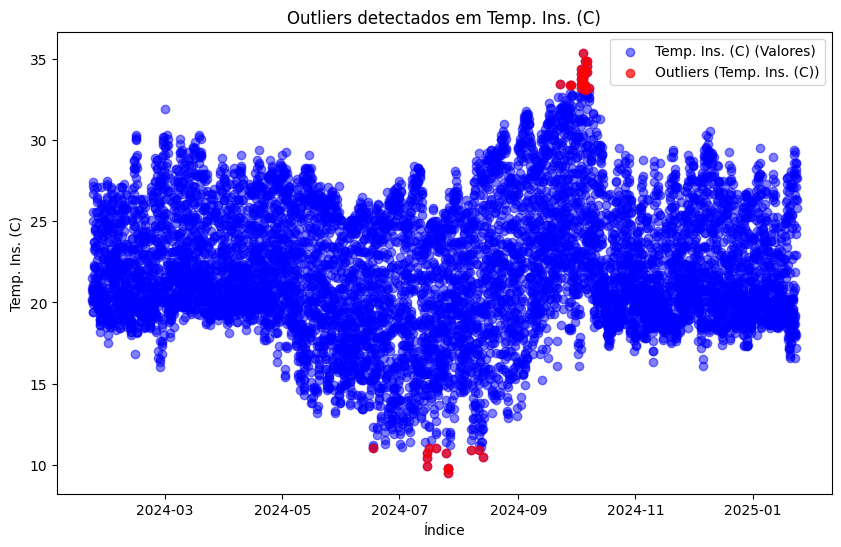

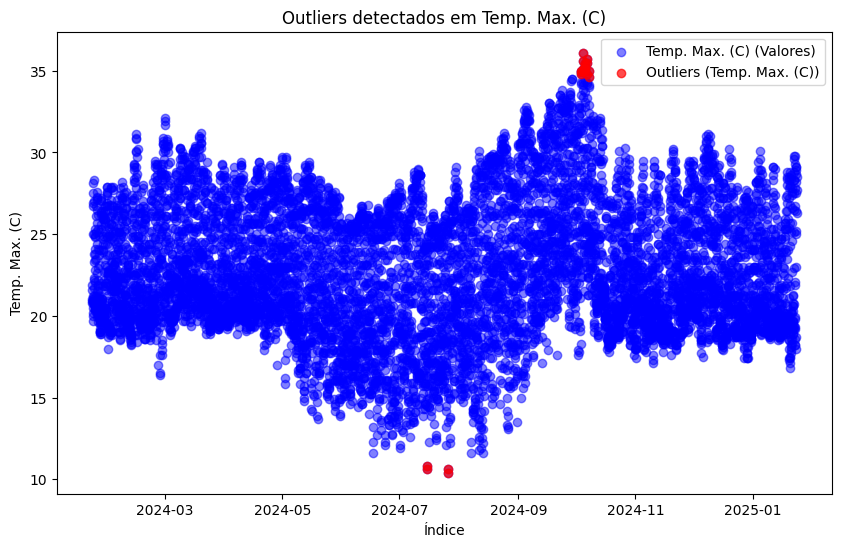

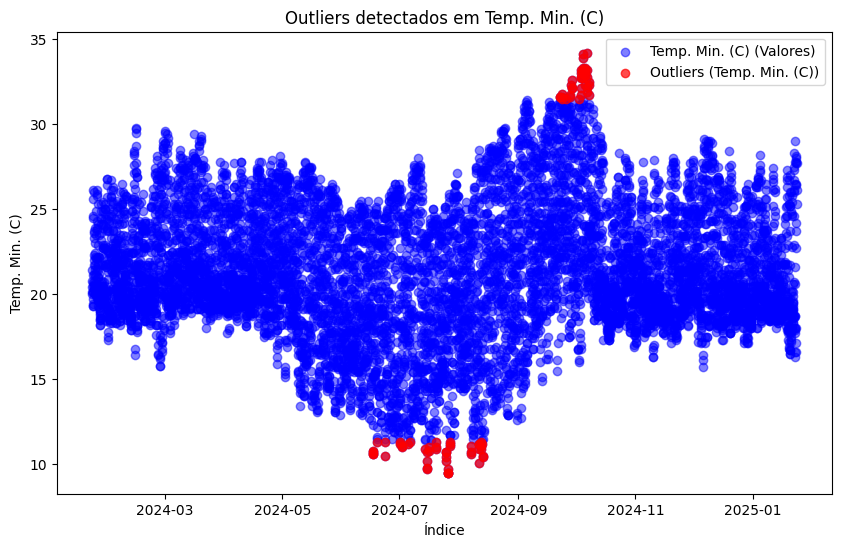

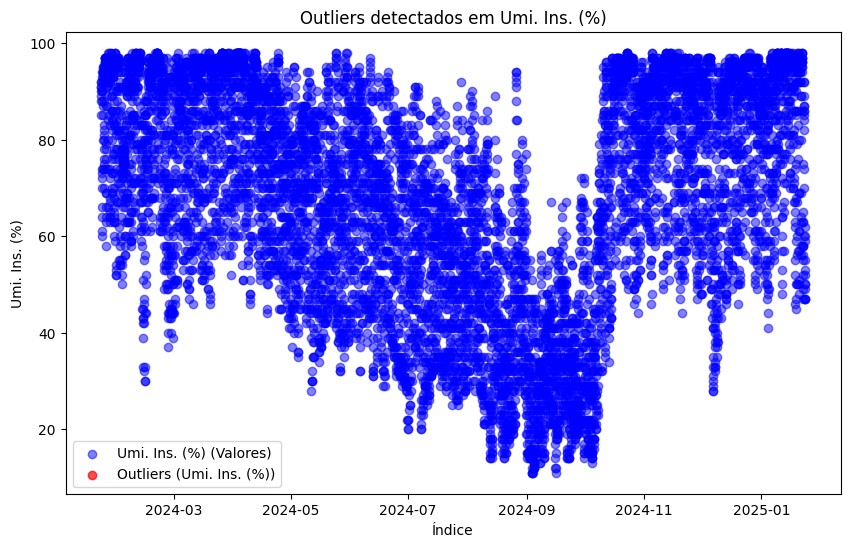

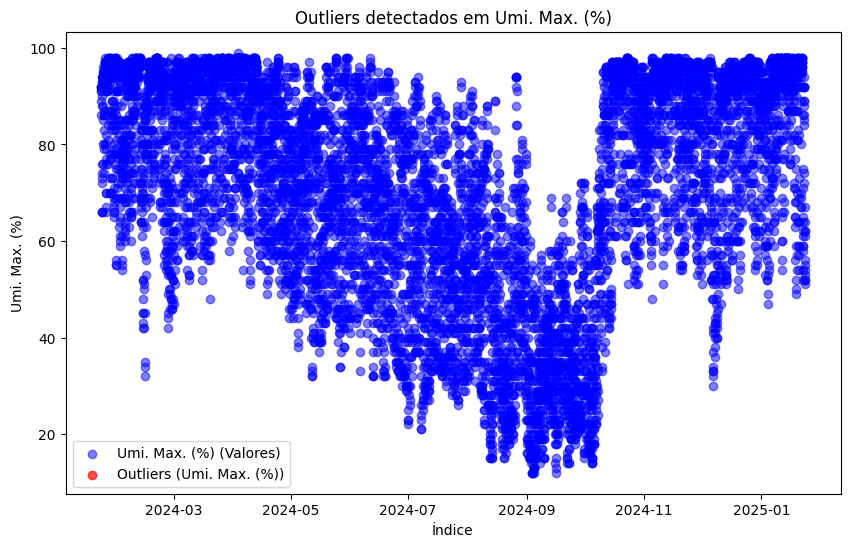

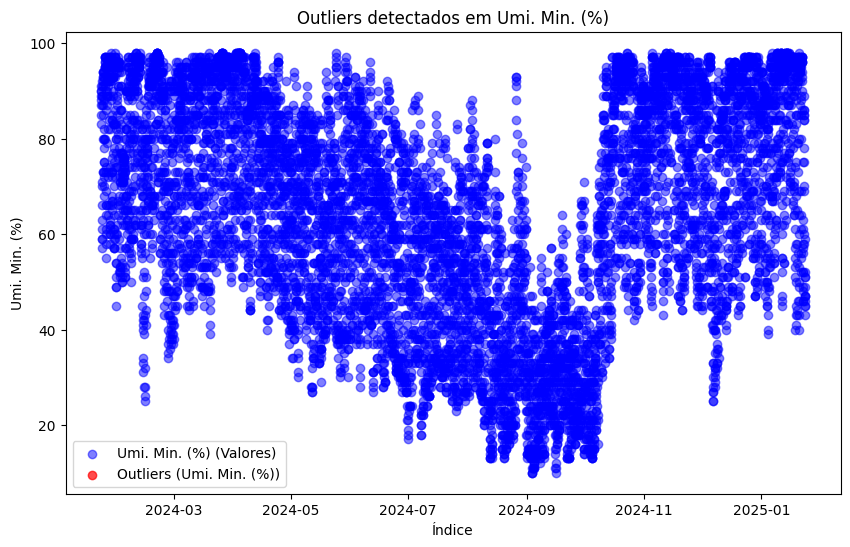

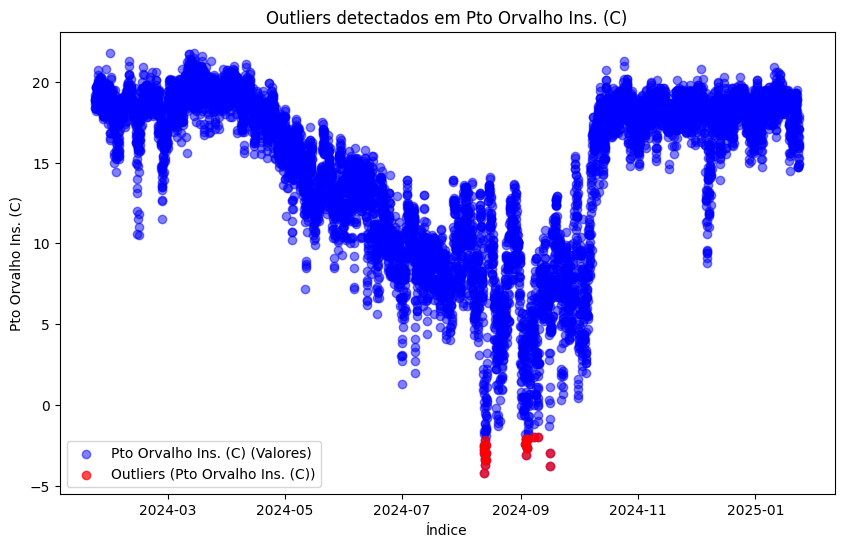

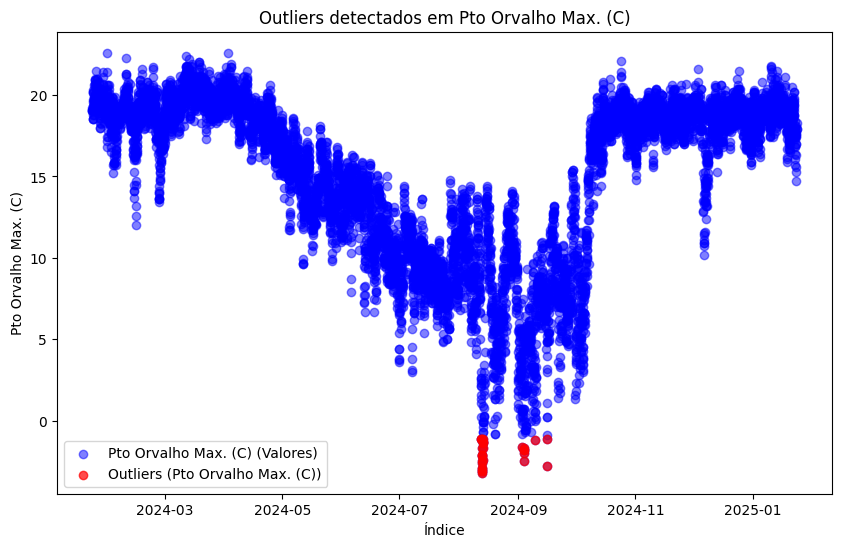

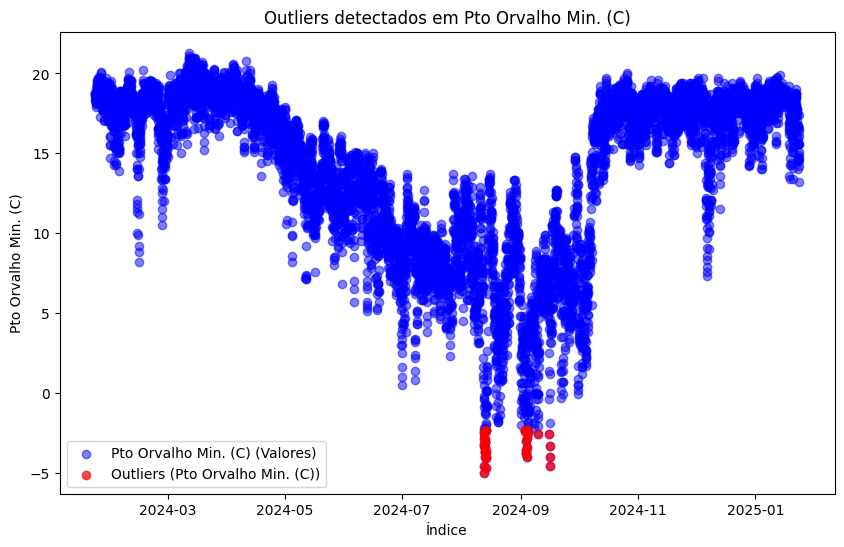

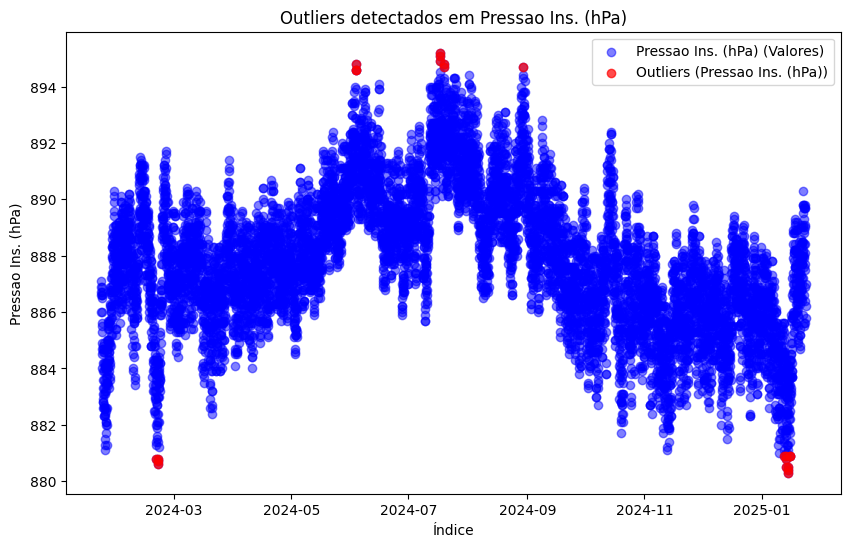

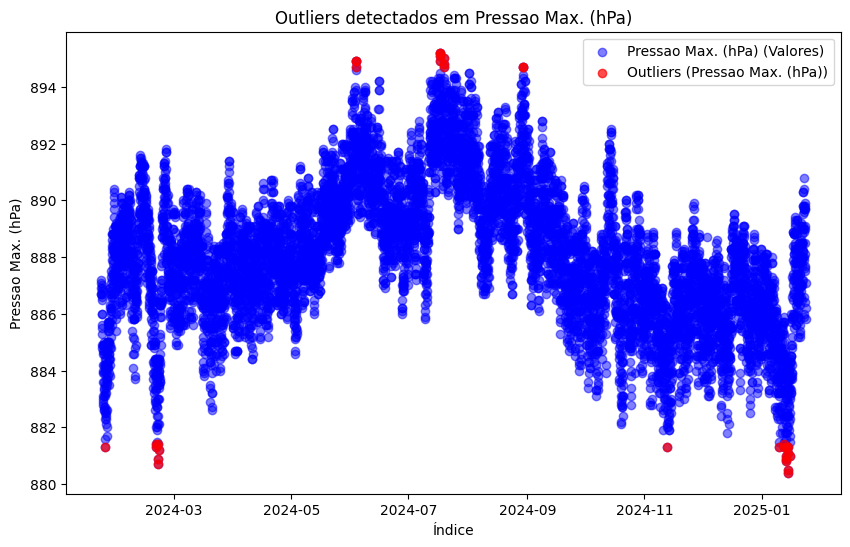

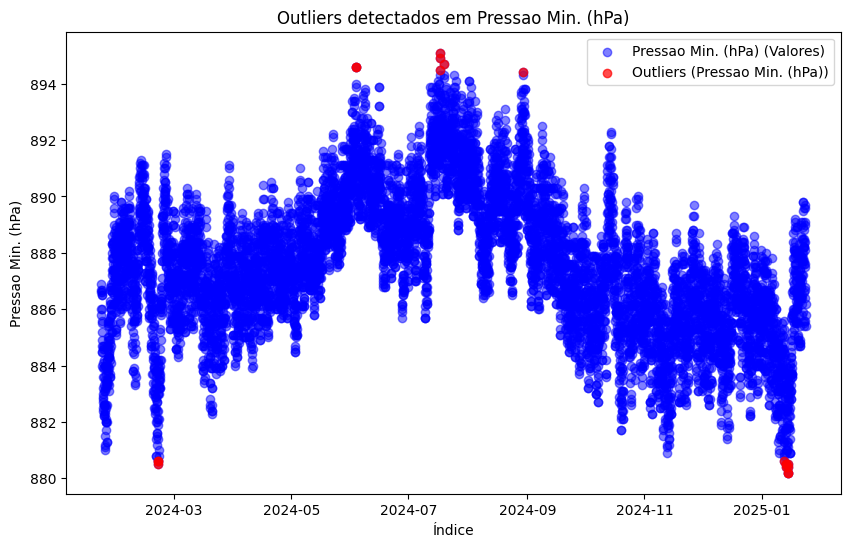

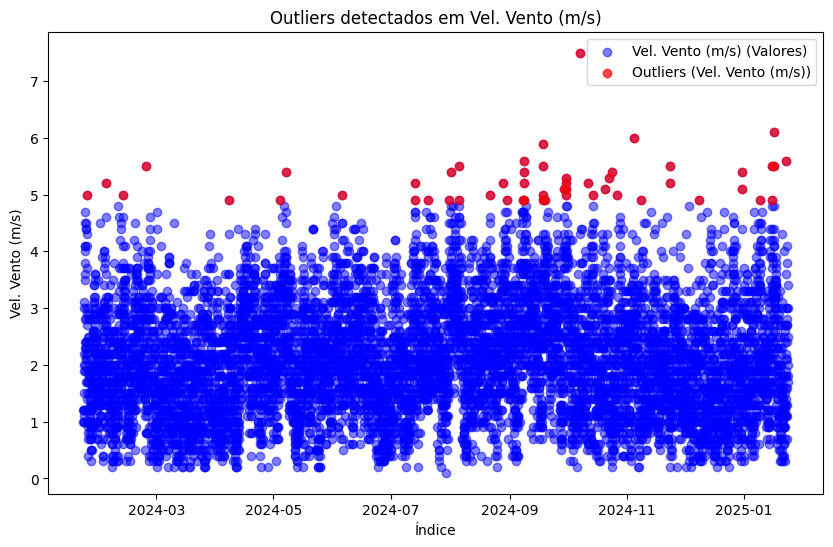

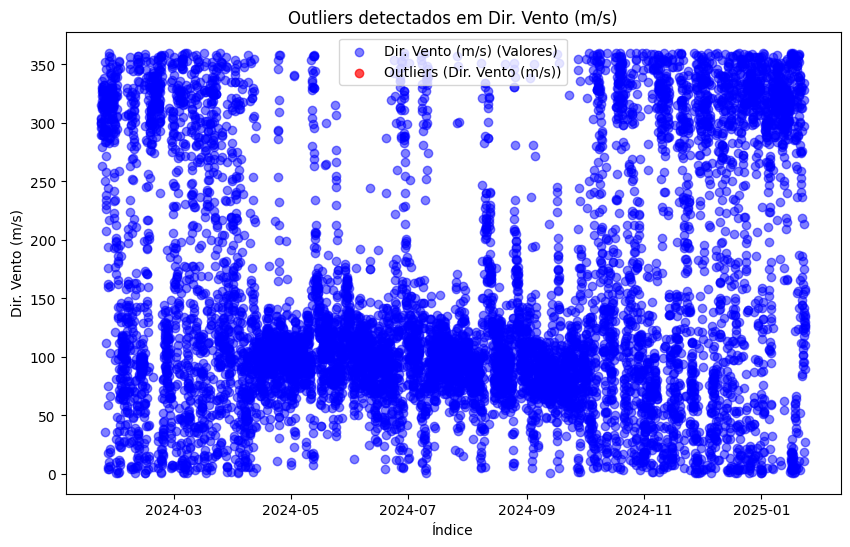

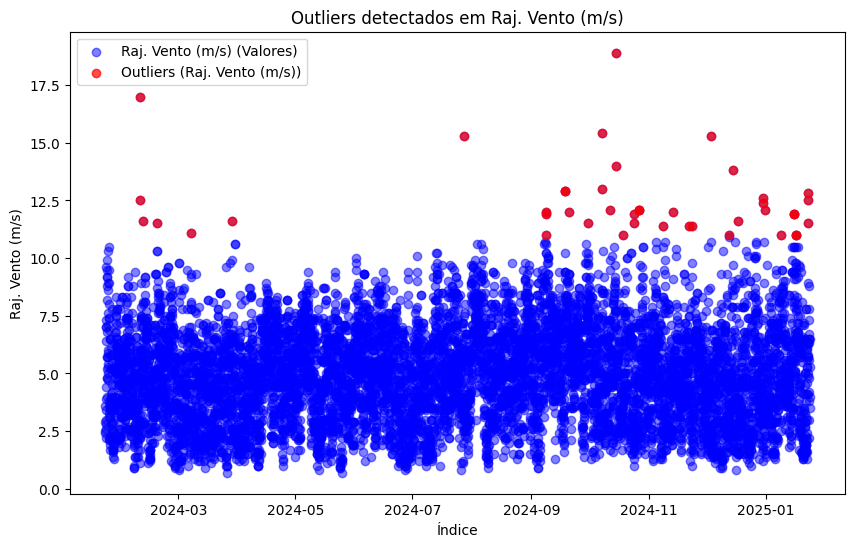

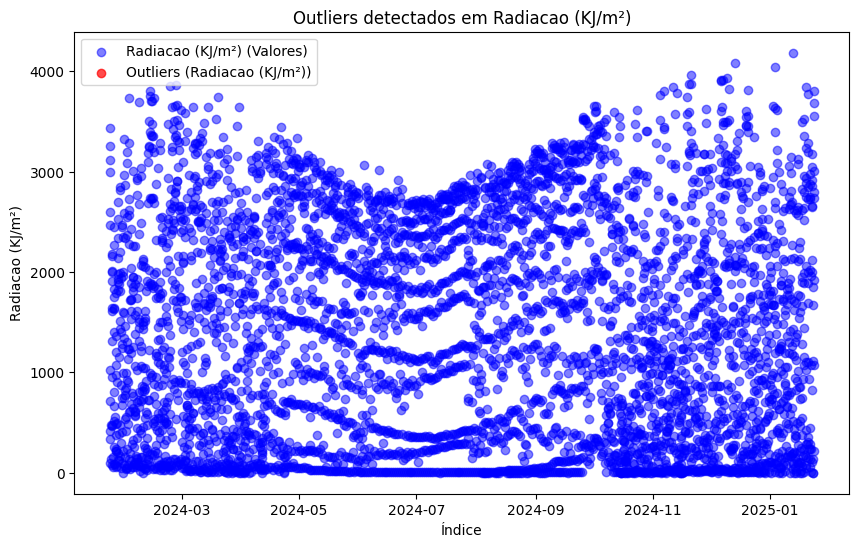

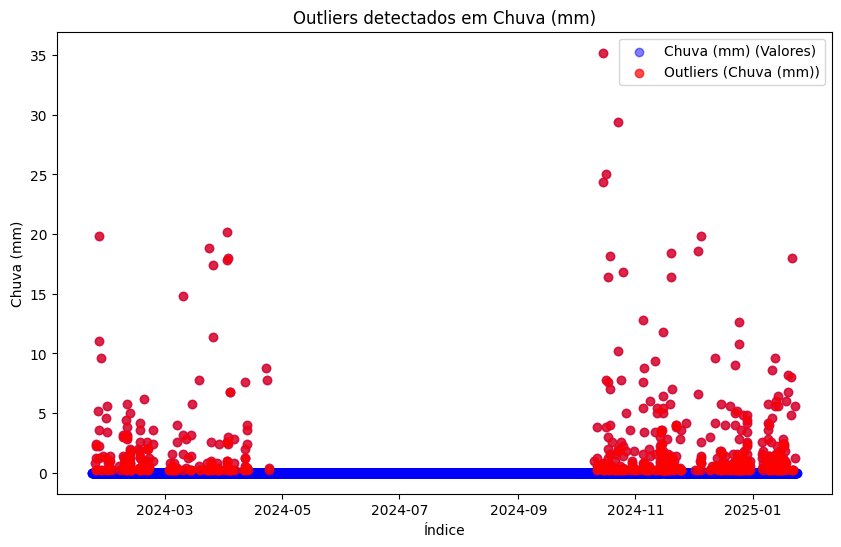

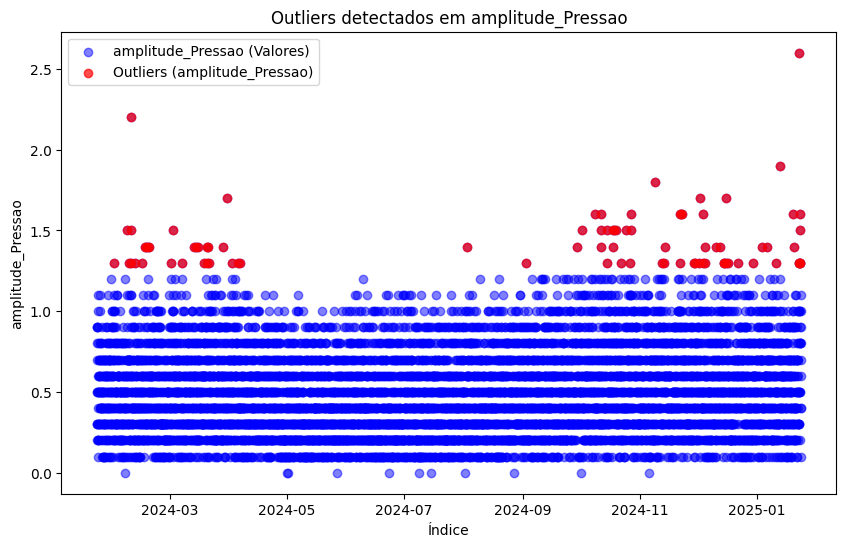

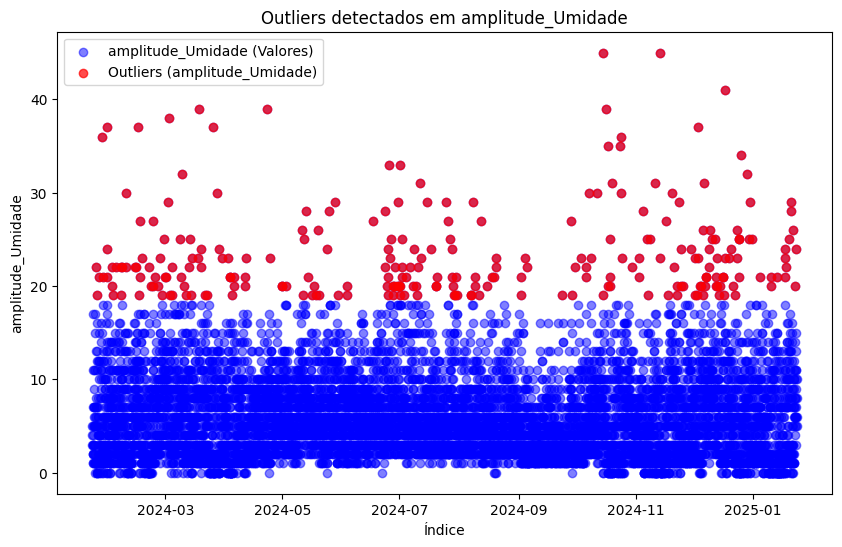

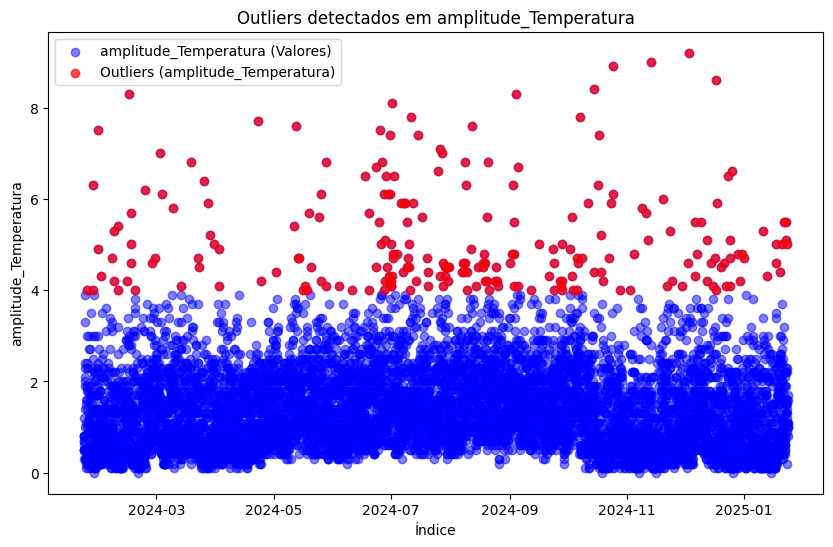

In [30]:
for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[coluna] < lower_bound) | (df[coluna] > upper_bound)]
        #print(f"\nOutliers detectados em {coluna}:")
        #print(outliers)

        plt.figure(figsize=(10, 6))
        
        # Plotando todos os pontos
        plt.scatter(df.index, df[coluna], label=f'{coluna} (Valores)', color='blue', alpha=0.5)
        
        # Plotando os outliers em vermelho
        plt.scatter(outliers.index, outliers[coluna], label=f'Outliers ({coluna})', color='red', alpha=0.7)
        
        # Adicionando título e rótulos
        plt.title(f"Outliers detectados em {coluna}")
        plt.xlabel('Índice')
        plt.ylabel(f'{coluna}')
        
        # Exibindo legenda
        plt.legend()
        
        # Exibindo o gráfico
        plt.show()

<h1>Insights<h1>

<h3>Resumo do dataset<h3>

A base de dados analisada contém dados meteorológicos referentes à estação BRASILIA A001, durante o período de 23/01/2024 a 23/01/2025. Ela possui 8808 linhas e 17 colunas, originalmente do tipo "object". O percentual de dados faltantes é de 3.02%.
As colunas contidas base são as seguintes: Temperatura Instantânea(C), Temperatura Máxima(C),Temperatura Mínima(C),Umidade Instantânea (%),Umidade Máxima. (%), Umidade Mínima (%), Pto Orvalho Instantânea (C),Pto Orvalho Máximo (C)*,Pto Orvalho Mínima (C),Pressao Instantânea (hPa),Pressao Máxima (hPa),Pressao Min. (hPa), Velocidade Vento (m/s),Dir. Vento (m/s), Raj. Vento (m/s), Radiacao (KJ/m²),Chuva (mm). 

* Pto Orvalho refere-se "ao momento a partir do qual se condensa o vapor de água que há na atmosfera e se produz, de acordo com a temperatura, escarcha, neblina ou orvalho¹."


¹ Conceito de ponto de orvalho. Conceito de, 2025. Disponível em: https://conceito.de/ponto-de-orvalho. Acesso em: 27/01/2025.
       

<h3>Análise dos gráficos<h3>

Com base na análise dos gráficos, é possível observar que tende a chover quando a temperatura está por volta de <b>20°C</b>. Isso ocorre tanto nos gráficos de temperatura instantânea quanto nos de temperatura minima e máxima. Além disso, de acordo com a análise da precipitação através do tempo, foi possível identificar a sazonalidade da chuva na estação analisada, que vai de  <b>novembro a abril<b>.<br>

Para a identificação dos <b>outliers</b>,foi adotado o IQR, que é a diferença entre o 3º e o 1º quartis. A partir do IQR, foram calculados os limites inferior e superior, e os dados foram classificados quanto a sua classificação dentro desses limites.<br>

Através da análise dos gráficos de outliers, também foi possível identificar a alta da pressão atmosférica nos meses de julho a setembro. Também foi identificada a estabilidade da temperatura nos meses de novembro a abril, com queda entre junho e julho e alta a partir de Agosto. A umidade relativa do ar apresentou valores constantes entre novembro e abril, com queda significativa nos meses de julho a setembro.<br>

As rajadas de vento mantiveram-se estáveis ao longo do ano, bem como a velocidade.<br>

Em relação à umidade, é possível observar que a precipitação está relacionada a valores altos de umidade, por volta de <b>90%</b>.<br>

Em todos os gráficos de pressão, a alta na precipitação está relacionada a valores máximos de <b>888 hPa</b>.<br>

A distribuição da chuva está associada à baixas velocidades de vento, concentrando-se em valores de 1 a 3 m/s. Já as rajadas de vento estão associadas a velocidades de vento de 2.5 a 10 m/s, apresentando grande concentração na parte esquerda do gráfico.

Por fim, ainda que a matriz de correlação não tenha apontado fortes relações entre as features apresentadas e a <b>precipitação</b>, é possível observar uma tendência de fenômenos que acontecem de maneira simultânea, como valores estáveis de temperatura, umidade e pressão durante os meses de novembro a abril. 


<h3>Sugestões de Melhorias<h3>

*Analisar dados de dois anos ou mais para avaliar a ciclicidade da temperatura, umidade e pressão através dos anos.<br>
*Aprofundar a análise do Ponto de formação de orvalho.